<a href="https://colab.research.google.com/github/harshitha-0531/Digit-recognizer/blob/main/Day8_ASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas and numpy and tenserflow and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers # Import models and layers here
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from tensorflow.keras.datasets import cifar100

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# normalise [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# one hot encode
num_classes=100
num_classes = 100
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)
print(y_train_cat.shape)

(50000, 32, 32, 3)
(50000, 100)


In [ ]:
# model building
ann = models.Sequential()
ann.add(layers.Flatten(input_shape=(32,32,3)))
ann.add(layers.Dense(1024, activation='relu'))
ann.add(layers.Dropout(0.5))
ann.add(layers.Dense(512, activation='relu'))
ann.add(layers.Dropout(0.4))
ann.add(layers.Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
keras.callbacks.ModelCheckpoint('ann_cifar100.h5', save_best_only=True)
]
history_ann = ann.fit(x_train, y_train_cat,
validation_split=0.1,
epochs=5,
batch_size=128,
callbacks=callbacks)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0187 - loss: 4.6408

352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.0187 - loss: 4.6403 - val_accuracy: 0.0504 - val_loss: 4.2519
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0380 - loss: 4.2889

352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.0380 - loss: 4.2888 - val_accuracy: 0.0658 - val_loss: 4.1218
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0493 - loss: 4.1974

352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.0493 - loss: 4.1973 - val_accuracy: 0.0886 - val_loss: 4.0990
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0528 - loss: 4.1473

352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0528 - loss: 4.1473 - val_accuracy: 0.0804 - val_loss: 4.0528
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0616 - loss: 4.1022

352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.0616 - loss: 4.1022 - val_accuracy: 0.0830 - val_loss: 4.0463


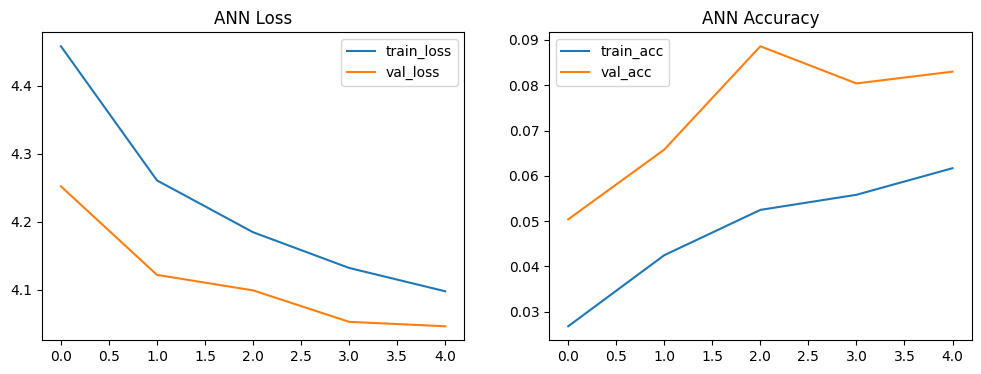

313/313 - 3s - 11ms/step - accuracy: 0.0841 - loss: 4.0302
ANN Test loss: 4.030184268951416
ANN Test accuracy: 0.08410000056028366


In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_ann.history['loss'], label='train_loss')
plt.plot(history_ann.history['val_loss'], label='val_loss')
plt.title('ANN Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_ann.history['accuracy'], label='train_acc')
plt.plot(history_ann.history['val_accuracy'], label='val_acc')
plt.title('ANN Accuracy')
plt.legend()
plt.show()

# evalute
ann_loss, ann_acc = ann.evaluate(x_test, y_test_cat, verbose=2)
print('ANN Test loss:', ann_loss)
print('ANN Test accuracy:', ann_acc)

In [ ]:
# cnn model
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.25))


cnn.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.3))


cnn.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.35))


cnn.add(layers.Flatten())
cnn.add(layers.Dense(512, activation='relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


callbacks = [
keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
keras.callbacks.ModelCheckpoint('cnn_cifar100.h5', save_best_only=True)
]


history_cnn = cnn.fit(x_train, y_train_cat,
validation_split=0.1,
epochs=5,
batch_size=128,
callbacks=callbacks)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.0338 - loss: 4.6916

352/352 ━━━━━━━━━━━━━━━━━━━━ 292s 817ms/step - accuracy: 0.0338 - loss: 4.6905 - val_accuracy: 0.0296 - val_loss: 5.5717
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.1036 - loss: 3.8632

352/352 ━━━━━━━━━━━━━━━━━━━━ 327s 830ms/step - accuracy: 0.1037 - loss: 3.8630 - val_accuracy: 0.1736 - val_loss: 3.4875
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.1478 - loss: 3.5555

352/352 ━━━━━━━━━━━━━━━━━━━━ 319s 821ms/step - accuracy: 0.1479 - loss: 3.5554 - val_accuracy: 0.2428 - val_loss: 3.0394
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.1962 - loss: 3.2875

352/352 ━━━━━━━━━━━━━━━━━━━━ 321s 816ms/step - accuracy: 0.1962 - loss: 3.2873 - val_accuracy: 0.2724 - val_loss: 2.9538
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.2307 - loss: 3.0846

352/352 ━━━━━━━━━━━━━━━━━━━━ 288s 817ms/step - accuracy: 0.2308 - loss: 3.0845 - val_accuracy: 0.2968 - val_loss: 2.7970


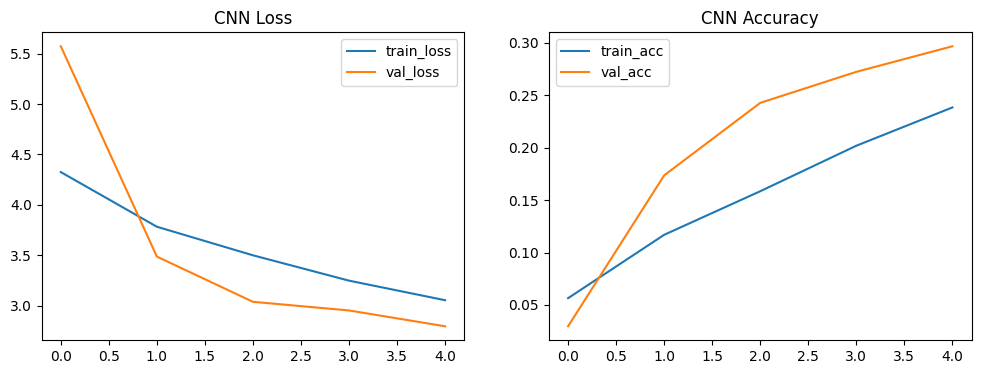

313/313 - 14s - 45ms/step - accuracy: 0.3110 - loss: 2.7302
CNN Test loss: 2.7301998138427734
CNN Test accuracy: 0.3109999895095825


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.title('CNN Accuracy')
plt.legend()
plt.show()


# Evaluate CNN
cnn_loss, cnn_acc = cnn.evaluate(x_test, y_test_cat, verbose=2)
print('CNN Test loss:', cnn_loss)
print('CNN Test accuracy:', cnn_acc)

In [ ]:
# predicted
y_pred_prob = cnn.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.reshape(-1)


print("\nClassification report (first 20 classes):")
print(classification_report(y_true, y_pred, labels=list(range(20)), zero_division=0))


# random predictions
idx = np.random.choice(len(x_test), 12, replace=False)
plt.figure(figsize=(12,6))
for i, j in enumerate(idx):
  plt.subplot(3,4,i+1)
  plt.imshow(x_test[j])
  plt.axis('off')
  plt.title(f'T:{y_true[j]} P:{y_pred[j]}')
plt.suptitle('Random test examples: True (T) vs Predicted (P)')
plt.show()

IndentationError: expected an indented block after 'for' statement on line 14 (ipython-input-3235634629.py, line 15)